In [45]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# kaggle competition https://www.kaggle.com/c/nlp-getting-started

In [61]:
# we will take train dataset from Kaggle and split it into train/ test (we cannot use test dataset from Kaggle
# since it has no labels)
all_data = pd.read_csv("train.csv")

In [62]:
all_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [63]:
all_data.shape

(7613, 5)

In [64]:
all_data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [65]:
all_data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [66]:
all_data.location.value_counts()

USA                               104
New York                           71
United States                      50
London                             45
Canada                             29
Nigeria                            28
UK                                 27
Los Angeles, CA                    26
India                              24
Mumbai                             22
Washington, DC                     21
Kenya                              20
Worldwide                          19
Australia                          18
Chicago, IL                        18
California                         17
California, USA                    15
Everywhere                         15
New York, NY                       15
San Francisco                      14
Florida                            14
United Kingdom                     14
Los Angeles                        13
Washington, D.C.                   13
Indonesia                          13
Toronto                            12
NYC         

In [67]:
all_data.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
body%20bags              41
sinking                  41
harm                     41
damage                   41
windstorm                40
outbreak                 40
collided                 40
fear                     40
twister                  40
evacuate                 40
siren                    40
weapon                   39
earthquake               39
flames                   39
weapons                  39
wrecked                  39
explosion                39
whirlwind                39
collision                39
hellfire                 39
derailment               39
wreckage                 39
sinkhole                 39
famine                   39
sunk                     39
drowned                  38
injury                   38
                         ..
trauma                   31
devastated               31
terrorist                31
bioterrorism             30
catastrophic        

In [68]:
all_data = all_data.fillna("")

In [69]:
# let's append keyword and lockation to the text:

def concat(a, b, c):
    return a + " " + b + " " + c

all_data['full_text'] = all_data.apply(lambda x: concat(x['keyword'], x['location'], x['text']), axis=1)

In [70]:
# random shift
all_data = all_data.sample(frac=1)

In [71]:
all_data.head()

,id,keyword,location,text,target,full_text
2295,3292,demolish,,I have completed the quest 'Demolish 5 Murlo.....,0,demolish I have completed the quest 'Demolish...
632,912,bioterrorism,,@APhiABeta1907 w/ugliness due 2 your 'ugly'@AM...,1,bioterrorism @APhiABeta1907 w/ugliness due 2 ...
904,1307,bloody,Glasgow,I'm awful at painting.. why did I agree to do ...,0,bloody Glasgow I'm awful at painting.. why did...
5219,7457,obliteration,"a feminist, modernist hag.",@ThatSabineGirl you get me sis. this planet co...,1,"obliteration a feminist, modernist hag. @ThatS..."
7550,10793,wrecked,,Poor Liv and I getting our phones wrecked on t...,0,wrecked Poor Liv and I getting our phones wre...


In [14]:
# this function was taken from https://www.kaggle.com/adinishad/nlp-80-accuracy
def clean_data(my_text):
    # Replace email addresses with 'email'
    processed = my_text.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    processed = processed.str.replace(r'£|\$', 'moneysymb')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumbr')

    # Replace numbers with 'numbr'
    processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    processed = processed.str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    processed = processed.str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    processed = processed.str.replace(r'^\s+|\s+?$', '')

    # change words to lower case - Hello, HELLO, hello are all the same word
    processed = processed.str.lower()
    
    # remove stop words
    stop_words = set(stopwords.words("english"))
    processed = processed.apply(lambda x:" ".join(term for term in word_tokenize(x) if term not in stop_words))
    
    # stemming
    ps = PorterStemmer()
    processed = processed.apply(lambda x:" ".join([ps.stem(word) for word in x.split()]))
    
    # lemmatization
    wl = WordNetLemmatizer()
    processed = processed.apply(lambda x:" ".join([wl.lemmatize(word) for word in x.split()]))
    
    
    return processed

In [15]:
all_data_clean = clean_data(all_data["full_text"])

In [16]:
all_data["full_text"][0]

'  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [17]:
all_data_clean[0]

'deed reason earthquak may allah forgiv u'

In [18]:
all_data["clean_text"] = all_data_clean

In [19]:
seed = 7

X = all_data.clean_text
y = all_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [20]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000) # limit number of features to avoid overfitting
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [21]:
X_train.shape

(6090, 10000)

## Decision Trees

Decision Trees. For the decision tree, you should implement or steal a decision tree algorithm (and by "implement or steal" I mean "steal"). Be sure to use some form of pruning. You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score

In [103]:
# in sklearn we can use the maximum depth of the tree for pruning 
# and The minimum number of samples required to split an internal node

max_depth = [25, 50, 100, 250]
min_samples_split = [2,8,20, 100]

for m in max_depth:
    print("max_depth: ", m)
    for n in min_samples_split:
        clf = DecisionTreeClassifier(random_state=0, max_depth=m, min_samples_split=n) # by defauld the model use GINI
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        print(" min_samples_split: ", n, " accuracy: ", np.median(scores))

max_depth:  25
 min_samples_split:  2  accuracy:  0.7104183757178015
 min_samples_split:  8  accuracy:  0.7128794093519278
 min_samples_split:  20  accuracy:  0.7153404429860541
 min_samples_split:  100  accuracy:  0.7104183757178015
max_depth:  50
 min_samples_split:  2  accuracy:  0.7260049220672683
 min_samples_split:  8  accuracy:  0.7243642329778507
 min_samples_split:  20  accuracy:  0.7145200984413453
 min_samples_split:  100  accuracy:  0.7243642329778507
max_depth:  100
 min_samples_split:  2  accuracy:  0.7165160230073953
 min_samples_split:  8  accuracy:  0.7128794093519278
 min_samples_split:  20  accuracy:  0.7124075595727198
 min_samples_split:  100  accuracy:  0.7140509449465899
max_depth:  250
 min_samples_split:  2  accuracy:  0.7030352748154225
 min_samples_split:  8  accuracy:  0.7009038619556286
 min_samples_split:  20  accuracy:  0.7033689400164339
 min_samples_split:  100  accuracy:  0.7074774034511093


In [72]:
# predict on the test data using the best parameters
clf = DecisionTreeClassifier(random_state=0, max_depth=50, min_samples_split=2)
clf.fit(X_train, y_train)
print("Training accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
pr = clf.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, pr))

Training accuracy:  0.8958949096880131
Testing accuracy:  0.7058437294812869


In [108]:
print(list(clf.feature_importances_))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009067017605536452, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005636132778262774, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008095551433514687, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008326852903043679, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003339966256289161, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0025507842454323875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00021588137156039166, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008212829023463412, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003606200184020182, 0.0, 0.00051811529174494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00208

###  Learning curves 

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve

In [115]:
X_train.shape

(6090, 10000)

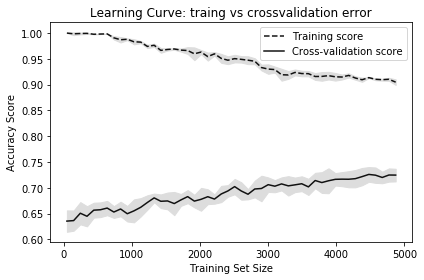

In [133]:
# I used this blog: https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(random_state=0, max_depth=50, min_samples_split=2), 
                                                        X_train, 
                                                        y_train,
                                                        cv=5,
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve: traing vs crossvalidation error")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [134]:
tr_size = np.linspace(0.01, 1.0, 50)
size = []
tr_accuracy = []
test_accuracy = []
n_tr_samples = X_train.shape[0]
for t in tr_size:
    clf = DecisionTreeClassifier(random_state=0, max_depth=50, min_samples_split=2)
    clf.fit(X_train[ :int(n_tr_samples*t)], y_train[ :int(n_tr_samples*t)])
    size.append(int(n_tr_samples*t))
    t = accuracy_score(y_train[ :int(n_tr_samples*t)],clf.predict(X_train[ :int(n_tr_samples*t)]) )
    tr_accuracy.append(t)
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))

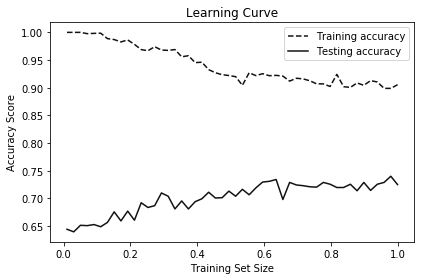

In [136]:
# Draw lines
plt.plot(tr_size, tr_accuracy, '--', color="#111111",  label="Training accuracy")
plt.plot(tr_size, test_accuracy, color="#111111", label="Testing accuracy")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Neural Networks

Neural Networks. For the neural network you should implement or steal your favorite kind of network and training algorithm. You may use networks of nodes with as many layers as you like and any activation function you see fit.

In [24]:
# I used this model: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
from sklearn.neural_network import MLPClassifier

In [138]:
layer_1 = [2, 5, 10, 50]
layer_2 = [2, 5, 10, 50]

for i in layer_1:
    for j in layer_2:
        #hidden_layer_sizes:  The ith element represents the number of neurons in the ith hidden layer.
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, j), random_state=1) 
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        print(" layer_1: ", i, "layer_2: ", j,  " accuracy: ", np.median(scores))

 layer_1:  2 layer_2:  2  accuracy:  0.760459392945037
 layer_1:  2 layer_2:  5  accuracy:  0.7567789646672145
 layer_1:  2 layer_2:  10  accuracy:  0.748974569319114
 layer_1:  2 layer_2:  50  accuracy:  0.7621000820344545
 layer_1:  5 layer_2:  2  accuracy:  0.5701394585726005
 layer_1:  5 layer_2:  5  accuracy:  0.7621000820344545
 layer_1:  5 layer_2:  10  accuracy:  0.7629204265791633
 layer_1:  5 layer_2:  50  accuracy:  0.7612797374897456
 layer_1:  10 layer_2:  2  accuracy:  0.5701394585726005
 layer_1:  10 layer_2:  5  accuracy:  0.7588187038556193
 layer_1:  10 layer_2:  10  accuracy:  0.7460969597370584
 layer_1:  10 layer_2:  50  accuracy:  0.7576006573541495
 layer_1:  50 layer_2:  2  accuracy:  0.761709120788825
 layer_1:  50 layer_2:  5  accuracy:  0.7502054231717338
 layer_1:  50 layer_2:  10  accuracy:  0.7588187038556193
 layer_1:  50 layer_2:  50  accuracy:  0.7477403451109285


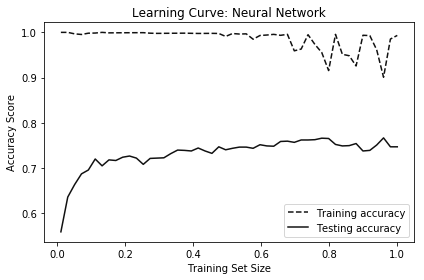

In [27]:
tr_size = np.linspace(0.01, 1.0, 50)
size = []
tr_accuracy = []
test_accuracy = []
n_tr_samples = X_train.shape[0]
for t in tr_size:
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2,2), random_state=1) 
    clf.fit(X_train[ :int(n_tr_samples*t)], y_train[ :int(n_tr_samples*t)])
    size.append(int(n_tr_samples*t))
    t = accuracy_score(y_train[ :int(n_tr_samples*t)],clf.predict(X_train[ :int(n_tr_samples*t)]) )
    tr_accuracy.append(t)
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    
# Draw lines
plt.plot(tr_size, tr_accuracy, '--', color="#111111",  label="Training accuracy")
plt.plot(tr_size, test_accuracy, color="#111111", label="Testing accuracy")

# Create plot
plt.title("Learning Curve: Neural Network")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

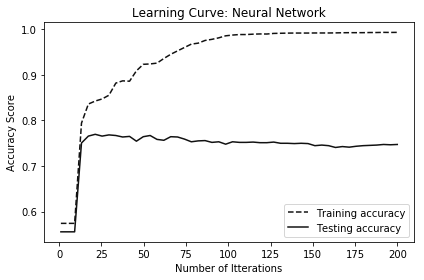

In [28]:
n_of_itterations = np.linspace(1, 200, 50)
tr_accuracy = []
test_accuracy = []
n_tr_samples = X_train.shape[0]
for t in n_of_itterations:
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2,2), random_state=1, max_iter = t) 
    clf.fit(X_train, y_train)
    t = accuracy_score(y_train,clf.predict(X_train))
    tr_accuracy.append(t)
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    
# Draw lines
plt.plot(n_of_itterations, tr_accuracy, '--', color="#111111",  label="Training accuracy")
plt.plot(n_of_itterations, test_accuracy, color="#111111", label="Testing accuracy")

# Create plot
plt.title("Learning Curve: Neural Network")
plt.xlabel("Number of Itterations"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [30]:
# it looks like we have overfitting after 25 iterations
layer_1 = [2, 5, 10, 50]
layer_2 = [2, 5, 10, 50]

for i in layer_1:
    for j in layer_2:
        #hidden_layer_sizes:  The ith element represents the number of neurons in the ith hidden layer.
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, j), random_state=1, max_iter=25) 
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        print(" layer_1: ", i, "layer_2: ", j,  " accuracy: ", np.median(scores))

 layer_1:  2 layer_2:  2  accuracy:  0.7891714520098442
 layer_1:  2 layer_2:  5  accuracy:  0.7850697292863003
 layer_1:  2 layer_2:  10  accuracy:  0.7633525061626951
 layer_1:  2 layer_2:  50  accuracy:  0.7233169129720853
 layer_1:  5 layer_2:  2  accuracy:  0.5738916256157636
 layer_1:  5 layer_2:  5  accuracy:  0.7807881773399015
 layer_1:  5 layer_2:  10  accuracy:  0.7621000820344545
 layer_1:  5 layer_2:  50  accuracy:  0.7725779967159278
 layer_1:  10 layer_2:  2  accuracy:  0.5738916256157636
 layer_1:  10 layer_2:  5  accuracy:  0.7809680065627563
 layer_1:  10 layer_2:  10  accuracy:  0.7588187038556193
 layer_1:  10 layer_2:  50  accuracy:  0.7534921939194741
 layer_1:  50 layer_2:  2  accuracy:  0.7610837438423645
 layer_1:  50 layer_2:  5  accuracy:  0.7801476620180475
 layer_1:  50 layer_2:  10  accuracy:  0.7830731306491372
 layer_1:  50 layer_2:  50  accuracy:  0.7799671592775042


In [73]:
# predict on the test data using the best parameters
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2,2), random_state=1, max_iter =25) 
clf.fit(X_train, y_train)
print("Training accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
pr = clf.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, pr))

Training accuracy:  0.8471264367816091
Testing accuracy:  0.7655942219304005


## Boosting

Boosting. Implement or steal a boosted version of your decision trees. As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
numb_of_estimators = [10, 50, 250]
max_depth_of_tree = [1, 10, 25, 50, 100, 250]

for i in numb_of_estimators:
    for j in max_depth_of_tree:
        clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=j),n_estimators=i, random_state=1) 
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        print(" number of estimators: ", i, "max depth of tree: ", j,  " accuracy: ", np.median(scores))

 number of estimators:  10 max depth of tree:  1  accuracy:  0.6896551724137931
 number of estimators:  10 max depth of tree:  10  accuracy:  0.7504105090311987
 number of estimators:  10 max depth of tree:  25  accuracy:  0.6981132075471698
 number of estimators:  10 max depth of tree:  50  accuracy:  0.7366694011484823
 number of estimators:  10 max depth of tree:  100  accuracy:  0.7380952380952381
 number of estimators:  10 max depth of tree:  250  accuracy:  0.735632183908046
 number of estimators:  50 max depth of tree:  1  accuracy:  0.7495894909688013
 number of estimators:  50 max depth of tree:  10  accuracy:  0.7307060755336617
 number of estimators:  50 max depth of tree:  25  accuracy:  0.7274220032840722
 number of estimators:  50 max depth of tree:  50  accuracy:  0.7370583401807724
 number of estimators:  50 max depth of tree:  100  accuracy:  0.7364532019704434
 number of estimators:  50 max depth of tree:  250  accuracy:  0.7263763352506163
 number of estimators:  250

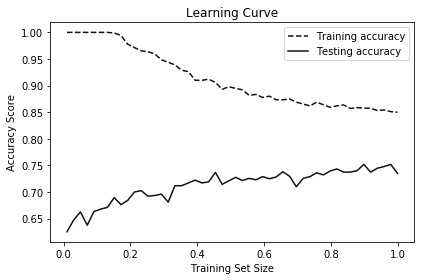

In [34]:
tr_size = np.linspace(0.01, 1.0, 50)
size = []
tr_accuracy = []
test_accuracy = []
n_tr_samples = X_train.shape[0]
for t in tr_size:
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=250, random_state=1)
    clf.fit(X_train[ :int(n_tr_samples*t)], y_train[ :int(n_tr_samples*t)])
    size.append(int(n_tr_samples*t))
    t = accuracy_score(y_train[ :int(n_tr_samples*t)],clf.predict(X_train[ :int(n_tr_samples*t)]) )
    tr_accuracy.append(t)
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    
# Draw lines
plt.plot(tr_size, tr_accuracy, '--', color="#111111",  label="Training accuracy")
plt.plot(tr_size, test_accuracy, color="#111111", label="Testing accuracy")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()    

In [74]:
# predict on the test data using the best parameters
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=250, random_state=1)
clf.fit(X_train, y_train)
print("Training accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
pr = clf.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, pr))

Training accuracy:  0.8499178981937603
Testing accuracy:  0.7347340774786605


## Support Vector Machine

Support Vector Machines. You should implement (for sufficiently loose definitions of implement including "download") SVMs. This should be done in such a way that you can swap out kernel functions. I'd like to see at least two.

In [36]:
from sklearn.svm import SVC

In [37]:
clf = SVC(kernel="linear",random_state=1)
clf.fit(X_train, y_train)
print("Training accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
pr = clf.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, pr))

Training accuracy:  0.90311986863711
Testing accuracy:  0.7767564018384767


In [40]:
clf = SVC(kernel="poly", degree=2, random_state=1)
clf.fit(X_train, y_train)
print("Training accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
pr = clf.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, pr))

Training accuracy:  0.574055829228243
Testing accuracy:  0.5554826001313198


In [41]:
clf = SVC(kernel="rbf", random_state=1)
clf.fit(X_train, y_train)
print("Training accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
pr = clf.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, pr))

Training accuracy:  0.574055829228243
Testing accuracy:  0.5554826001313198


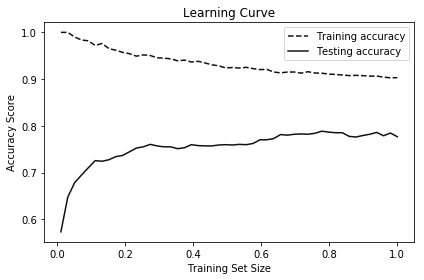

In [43]:
tr_size = np.linspace(0.01, 1.0, 50)
size = []
tr_accuracy = []
test_accuracy = []
n_tr_samples = X_train.shape[0]
for t in tr_size:
    clf = SVC(kernel="linear",random_state=1)
    clf.fit(X_train[ :int(n_tr_samples*t)], y_train[ :int(n_tr_samples*t)])
    size.append(int(n_tr_samples*t))
    t = accuracy_score(y_train[ :int(n_tr_samples*t)],clf.predict(X_train[ :int(n_tr_samples*t)]) )
    tr_accuracy.append(t)
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    
# Draw lines
plt.plot(tr_size, tr_accuracy, '--', color="#111111",  label="Training accuracy")
plt.plot(tr_size, test_accuracy, color="#111111", label="Testing accuracy")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

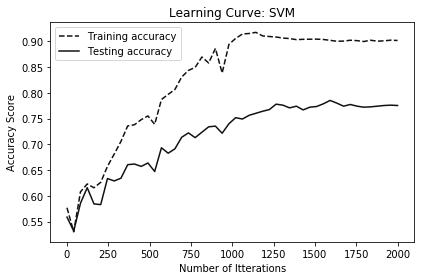

In [75]:
n_of_itterations = np.linspace(1, 2000, 50)
tr_accuracy = []
test_accuracy = []
n_tr_samples = X_train.shape[0]
for t in n_of_itterations:
    clf = SVC(kernel="linear",random_state=1, max_iter=t)
    clf.fit(X_train, y_train)
    t = accuracy_score(y_train,clf.predict(X_train))
    tr_accuracy.append(t)
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    
# Draw lines
plt.plot(n_of_itterations, tr_accuracy, '--', color="#111111",  label="Training accuracy")
plt.plot(n_of_itterations, test_accuracy, color="#111111", label="Testing accuracy")

# Create plot
plt.title("Learning Curve: SVM")
plt.xlabel("Number of Itterations"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## KNN

k-Nearest Neighbors. You should "implement" (the quotes mean I don't mean it: steal the code) kNN. Use different values of k.

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
k = [3, 5, 11, 21, 30, 50, 70, 100]

numb_of_estimators = [10, 50, 250]
max_depth_of_tree = [1, 10, 25, 50, 100, 250]

for i in k:
    clf = KNeighborsClassifier(n_neighbors=i) 
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print(" number of estimators: ", i, "max depth of tree: ", j,  " accuracy: ", np.median(scores))

 number of estimators:  3 max depth of tree:  250  accuracy:  0.6814449917898193
 number of estimators:  5 max depth of tree:  250  accuracy:  0.6584564860426929
 number of estimators:  11 max depth of tree:  250  accuracy:  0.729064039408867
 number of estimators:  21 max depth of tree:  250  accuracy:  0.7387017255546425
 number of estimators:  30 max depth of tree:  250  accuracy:  0.7364532019704434
 number of estimators:  50 max depth of tree:  250  accuracy:  0.7403451109285127
 number of estimators:  70 max depth of tree:  250  accuracy:  0.7430213464696224
 number of estimators:  100 max depth of tree:  250  accuracy:  0.7428101889893179


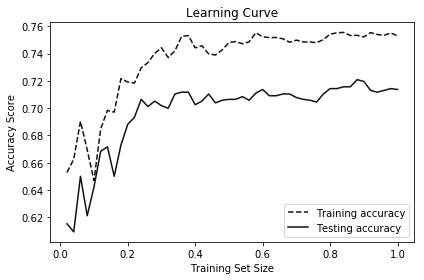

In [56]:
tr_size = np.linspace(0.02, 1.0, 50)
size = []
tr_accuracy = []
test_accuracy = []
n_tr_samples = X_train.shape[0]
for t in tr_size:
    clf = KNeighborsClassifier(n_neighbors=70)
    clf.fit(X_train[ :int(n_tr_samples*t)], y_train[ :int(n_tr_samples*t)])
    size.append(int(n_tr_samples*t))
    t = accuracy_score(y_train[ :int(n_tr_samples*t)],clf.predict(X_train[ :int(n_tr_samples*t)]) )
    tr_accuracy.append(t)
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    
# Draw lines
plt.plot(tr_size, tr_accuracy, '--', color="#111111",  label="Training accuracy")
plt.plot(tr_size, test_accuracy, color="#111111", label="Testing accuracy")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

In [59]:
clf = KNeighborsClassifier(n_neighbors=70)
clf.fit(X_train, y_train)
print("Training accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
pr = clf.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, pr))

Training accuracy:  0.7530377668308703
Testing accuracy:  0.7137229152987524
